In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fe-course-data/spotify.csv
/kaggle/input/fe-course-data/ames.csv
/kaggle/input/fe-course-data/DataDocumentation.txt
/kaggle/input/fe-course-data/movielens1m.csv
/kaggle/input/fe-course-data/abalone.csv
/kaggle/input/fe-course-data/concrete.csv
/kaggle/input/fe-course-data/autos.csv
/kaggle/input/fe-course-data/accidents.csv
/kaggle/input/fe-course-data/customer.csv
/kaggle/input/fe-course-data/caravan.csv
/kaggle/input/fe-course-data/airbnb.csv
/kaggle/input/fe-course-data/bike-sharing.csv
/kaggle/input/fe-course-data/housing.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import chardet
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif
%matplotlib inline
%config InlineBacked.figure_format='retina'
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/fe-course-data/autos.csv')
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [5]:
X=df.copy()
y=X.pop('price')


In [6]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [7]:
for i in X.select_dtypes('object'):
    X[i],_=X[i].factorize()
    

In [8]:
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,65.5,52.4,2823,1,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,66.2,54.3,2337,2,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,66.4,54.3,2824,2,5,136,0,3.19,3.40,8,115,5500,18,22


In [9]:
discrete_feature=X.dtypes==int

In [10]:
def mi_score(X,y,feature):
    score=mutual_info_regression(X,y,feature)
    table=pd.Series(score,name="MI score",index=X.columns)
    return table



In [11]:
mi_score_table=mi_score(X,y,discrete_feature).sort_values(ascending=False)
mi_score_table

curb_weight          1.553934
horsepower           1.265758
engine_size          1.008797
highway_mpg          0.957637
city_mpg             0.861045
width                0.684898
length               0.611586
wheel_base           0.591242
make                 0.544507
fuel_system          0.482483
bore                 0.480550
peak_rpm             0.450597
stroke               0.385846
height               0.365904
drive_wheels         0.333404
num_of_cylinders     0.332900
symboling            0.229938
engine_type          0.150219
compression_ratio    0.133171
aspiration           0.087994
body_style           0.080116
fuel_type            0.047298
engine_location      0.035905
num_of_doors         0.012234
Name: MI score, dtype: float64

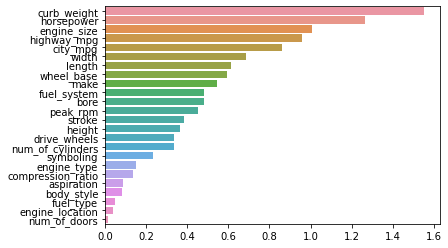

In [12]:
def plt_mi_score(table):
    sns.barplot(table.values,table.index)
plt_mi_score(mi_score_table)

<AxesSubplot:xlabel='curb_weight', ylabel='price'>

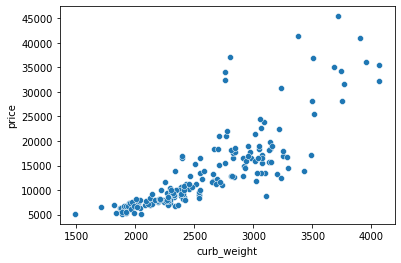

In [13]:
sns.scatterplot(y='price',x='curb_weight',data=df)

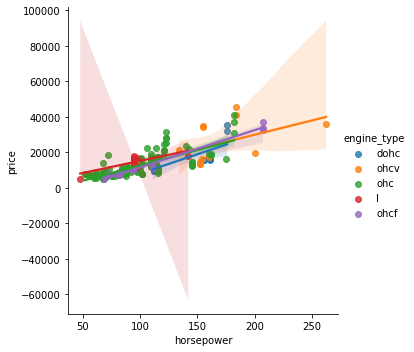

In [14]:
sns.lmplot(y='price',x='horsepower',data=df,hue='engine_type')